In [ ]:
# Authors: The MNE-Python contributors.
# License: BSD-3-Clause
# Copyright the MNE-Python contributors.

import base64
import glob
import os
import pickle
import re
import shutil
from io import BytesIO
from pathlib import Path

import numpy as np
import pytest
from matplotlib import pyplot as plt

import mne
from mne import (
    Epochs,
    create_info,
    pick_channels_cov,
    read_cov,
    read_events,
    read_evokeds,
)
from mne._fiff.write import DATE_NONE
from mne.datasets import testing
from mne.epochs import make_metadata
from mne.io import RawArray, read_info, read_raw_fif
from mne.preprocessing import ICA
from mne.report import Report, _ReportScraper, open_report, report
from mne.report import report as report_mod
from mne.report.report import (
    _ALLOWED_IMAGE_FORMATS,
    CONTENT_ORDER,
)
from mne.utils import Bunch, _record_warnings
from mne.utils._testing import assert_object_equal
from mne.viz import plot_alignment

data_dir = testing.data_path(download=True)
subjects_dir = data_dir / "subjects"
sample_meg_dir = data_dir / "MEG" / "sample"
raw_fname = sample_meg_dir / "sample_audvis_trunc_raw.fif"
fwd_fname = sample_meg_dir / "sample_audvis_trunc-meg-eeg-oct-6-fwd.fif"
trans_fname = sample_meg_dir / "sample_audvis_trunc-trans.fif"
mri_fname = subjects_dir / "sample" / "mri" / "T1.mgz"
bem = r"C:\Users\ferat\mne_data\MNE-testing-data\subjects\sample\bem\sample-320-320-320-bem-sol.fif"


data_dir = testing.data_path(download=True)
subjects_dir = data_dir / "subjects"
sample_meg_dir = data_dir / "MEG" / "sample"
fwd_fname = sample_meg_dir / "sample_audvis_trunc-meg-eeg-oct-6-fwd.fif"
fwd = mne.read_forward_solution(fwd_fname)
fwd["info"]

Reading forward solution from C:\Users\ferat\mne_data\MNE-testing-data\MEG\sample\sample_audvis_trunc-meg-eeg-oct-6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523 (FIFF_MNE_FORWARD_SOLUTION_GRAD)) not available
    Read MEG forward solution (7928 sources, 306 channels, free orientations)
    Desired named matrix (kind = 3523 (FIFF_MNE_FORWARD_SOLUTION_GRAD)) not available
    Read EEG forward solution (7928 sources, 60 channels, free orientations)
    Forward solutions combined: MEG, EEG
    Source spaces transformed to the forward solution coordinate frame


<Info | 11 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 60 EEG
 command_line: mne_forward_solution --meg --eeg --accurate --src ...
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 meas_file: sample_audvis_trunc_raw.fif
 mri_file: ./sample_audvis_trunc-trans.fif
 mri_head_t: MRI (surface RAS) -> head transform
 mri_id: 4 items (dict)
 nchan: 366
 working_dir: /home/larsoner/custombuilds/mne-python/examples/MNE-testing- ...
>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using outer_skin.surf for head surface.
Getting helmet for system 306m
Channel types::	grad: 203, mag: 102, eeg: 59
lateral_r


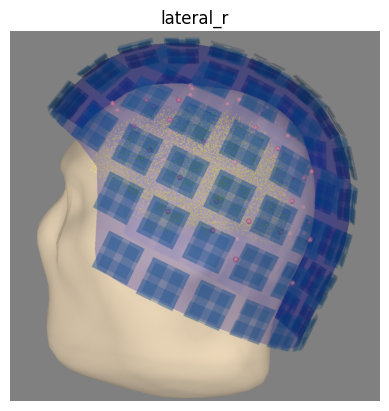

frontal_r


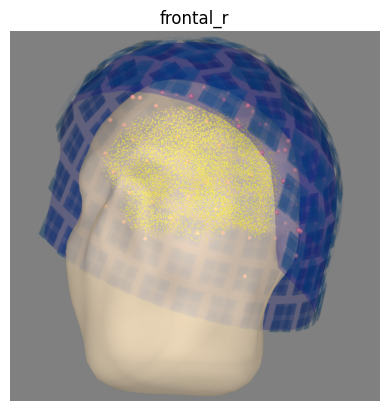

frontal


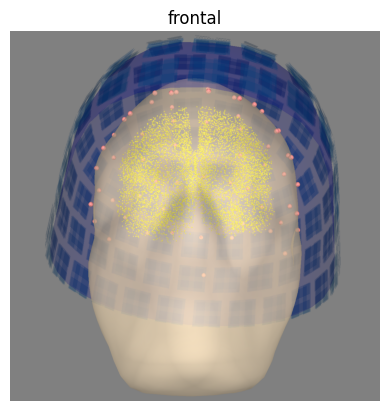

frontal_l


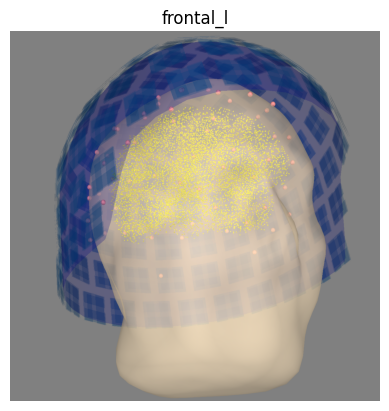

lateral_l


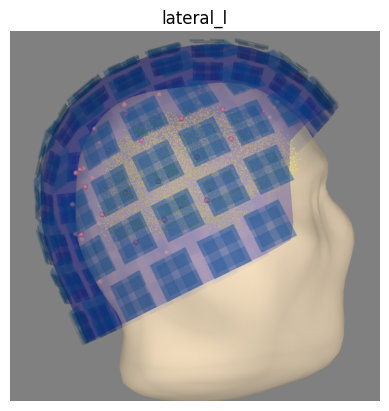

back


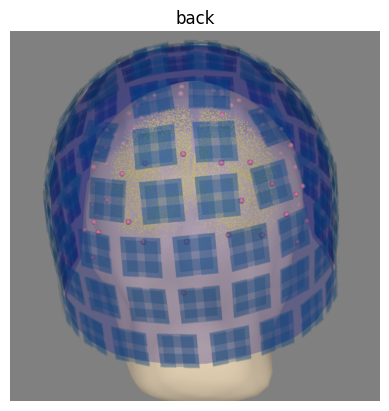

top


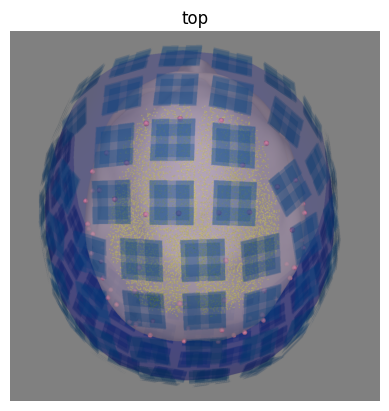

In [13]:
%load_ext autoreload
%autoreload 2


from mne.viz._brain.view import views_dicts
from mne.viz import set_3d_view
from mne.viz.backends.renderer import MNE_3D_BACKEND_TESTING, backend
src = fwd["src"]
fig = mne.viz.plot_alignment(subject="sample", subjects_dir=subjects_dir, src=src, trans=fwd["mri_head_t"], info=fwd["info"])

for view in views_dicts["both"].keys():
    print(view)
    set_3d_view(fig, **views_dicts["both"][view])
    im = backend._take_3d_screenshot(figure=fig)

    plt.figure()
    plt.imshow(im)
    plt.title(view)
    plt.axis("off")
    plt.show()

In [ ]:
%load_ext autoreload
%autoreload 2

report = Report(subject="sample", subjects_dir=subjects_dir, verbose=True)
report.add_forward(fwd, "forward")
report.save("test_report.html", overwrite=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Embedding : jquery-3.6.0.min.js
Embedding : bootstrap.bundle.min.js
Embedding : bootstrap.min.css
Embedding : bootstrap-table/bootstrap-table.min.js
Embedding : bootstrap-table/bootstrap-table.min.css
Embedding : bootstrap-table/bootstrap-table-copy-rows.min.js
Embedding : bootstrap-table/bootstrap-table-export.min.js
Embedding : bootstrap-table/tableExport.min.js
Embedding : bootstrap-icons/bootstrap-icons.mne.min.css
Embedding : highlightjs/highlight.min.js
Embedding : highlightjs/atom-one-dark-reasonable.min.css
